# Iris Species Classification

## Agenda:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Columns Description](#3)
    - 1.3 [Objective](#4)
2. [Data Preparation](#5)
    - 2.1 [Packages & Helping Functions](#6)
    - 2.2 [Data Loading](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#11)
    - 3.1 [Univariate Analysis](#12)
    - 3.2 [Bivariate Analysis](#13)
4. [Modeling](#14)
    - 4.1 [Packages](#15)
    - 4.2 [Splitting and Preprocessing](#16)
    - 4.3 [Decision Tree](#17)
    - 4.4 [Naïve Bayes](#18)
    - 4.5 [AdaBoost](#19)
    - 4.6 [Perceptron (a single level neural network)](#20)
    - 4.7 [Random forests](#21)
5. [Conclusion](#22)

<h1><center>1. Introduction</center></h1><a id=1></a>

### 1.1 Context <a id=2></a>
The [dataset](https://www.kaggle.com/uciml/iris) includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

### 1.2 Columns Description <a id=3></a>
| Column | Description |
| :- | :- |
| SepalLengthCm | Sepal Length given in cm |
| SepalWidthCm | Sepal Width given in cm |
| PetalLengthCm | Petal Length given in cm |
| PetalWidthCm | Petal Width given in cm |
| Species | The target value, takes one of three values (Iris-setosa / Iris-versicolor / Iris-virginica) |

### 1.3 Objective <a id=4></a>

Building a machine learning model to accurately predict the species of the flower based on its sepal and petal dimensions.

<h1><center>2. Data Preparation</center></h1><a id=5></a>

### 2.1 Packages & Helping Functions <a id=6></a>

In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To evaluate different models
from sklearn.metrics import *

# To change the style of the plots ( so that all people can see the same colors )
plt.style.use('seaborn')


### 2.2 Data Loading<a id=7></a>

Fetching the data 

In [2]:
!wget -q https://datasets.mlpack.org/iris.csv

Adding column names

In [3]:
df = pd.read_csv("iris.csv", names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

Adding the labels column

In [4]:
df["Species"] = "None"

In [5]:
df.loc[:50, "Species"] = "Iris-setosa"
df.loc[50:100, "Species"] = "Iris-versicolor"
df.loc[100:150, "Species"] = "Iris-virginica"

### 2.3 Understanding Data <a id=8></a>

##### 2.3.1 Preview of the first five rows of the data

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2.3.2 The shape of the data

In [7]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (150, 5)


#### 2.3.3 Columns info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2.3.4 Summary statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


#### 2.3.5 Duplicates

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace = True);
df.duplicated().sum()

0

In [12]:
df.shape

(147, 5)

## Summary
From the previous quick overview of the data we can conclude basic bullet points:
- The dataset is mostly clean.
- 'Species' is our only categorical column.
- There is no missing values

<h1><center>3. Exploratory Data Analysis</center></h1><a id=11></a>

In this stage, we will try to detect the relationship between the features and the variable of interest (Outcome) and also the relationship among the features themselves.

### 3.1 Univariate Analysis <a id=12></a>

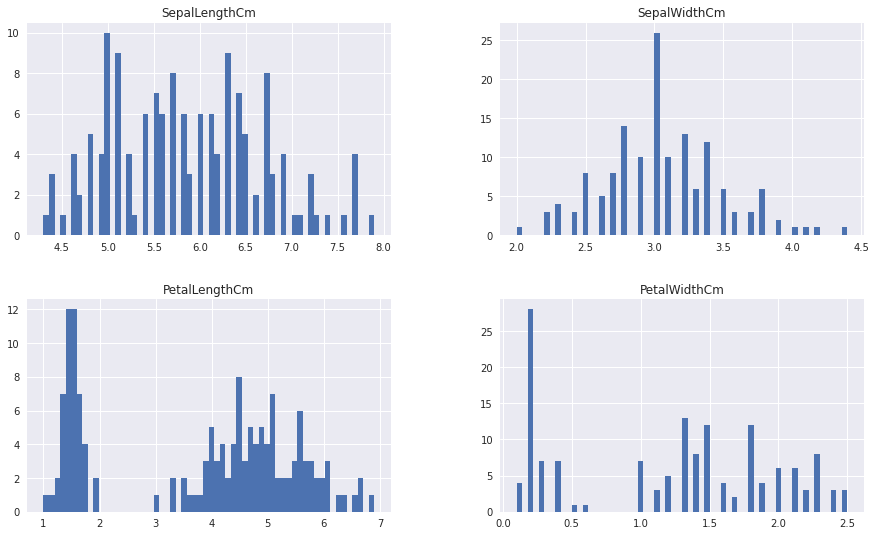

In [13]:
df.hist(bins=60, figsize=(15,9));
plt.show()

**Observations:**
- Feature PetalLengthCm has a bimodal distribution with one of the peaks at 14 cm and the other is at 8.
- Feature PetalWidthCm also has a bimodal distribution.
- Feature SepalWidthCm has a roughly uniform distribution.

### 3.2 Bivariate Analysis <a id=13></a>

Because the number of features are relatively small and all the features  are numeric, we can plot a nicely looking heatmap and make use of it to investigate different relationships.

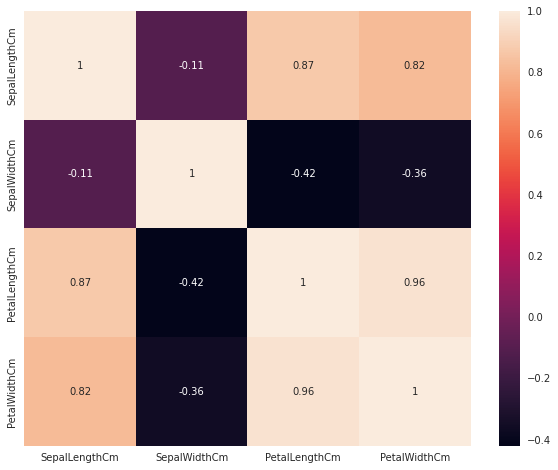

In [14]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr(numeric_only=True),annot=True) 
plt.show()

Petal Width, Petal Length and Sepal Length are positively correlated.  

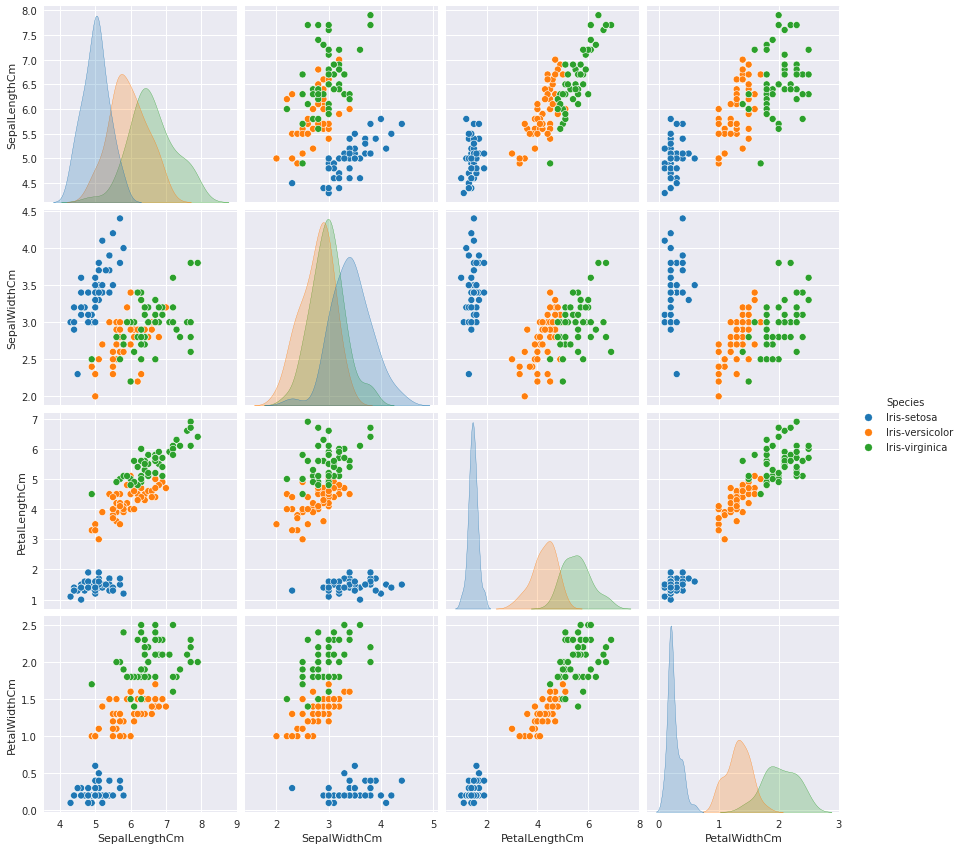

In [15]:
g = sns.pairplot(df, hue='Species', palette = 'tab10', height = 3)
plt.show()

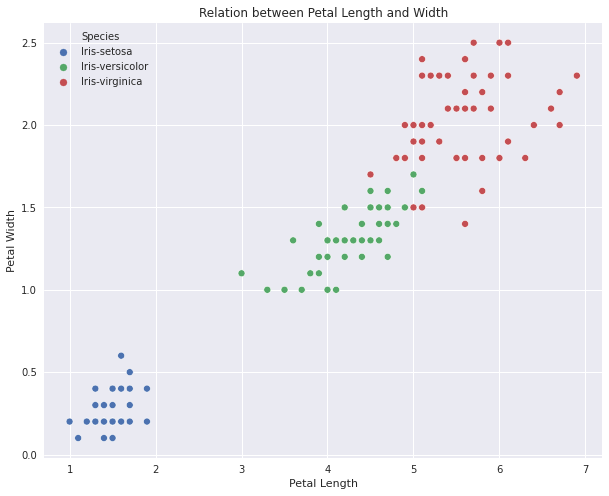

In [16]:
plt.figure(figsize=(10,8)) 
fig = sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species');
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Relation between Petal Length and Width")
plt.show();

Petal Features are giving a good cluster division

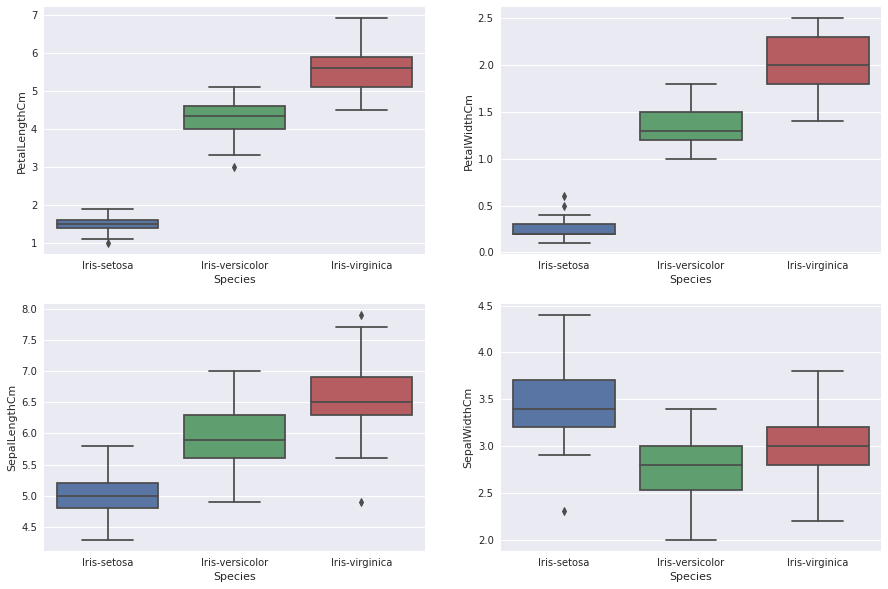

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.show();

<h1><center>4. Modeling</center></h1><a id=14></a>

### 4.1 Packages <a id=15></a>

In [18]:
import mlpack

### 4.2 Splitting and Preprocessing <a id=16></a>

Preprocessing

In [19]:
df['Species'] = df['Species'].astype('category')

In [20]:
df['Species'] = df['Species'].cat.codes

In [21]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [22]:
X = df[features]
y = df["Species"]

Splitting

In [23]:
def TrainTestSplit(features, target, test_ratio=0.2, standardize=False):
    """
    Splits the features & target into respective training and test set based on the test ratio.
    
        Parameter:
            features (DataFrame): Pandas dataframe containing the features.
            target (DataFrame): Pandas dataframe containing the targets.
            test_ratio (double): Percentage of dataset to be hold out for test set. default 20%.
            standardize (bool): if True, features are scaled, default False.
            
        Returns:
            Xtrain (DataFrame): Pandas dataframe containing training features.
            Xtest (DataFrame): Pandas dataframe containing test features.
            ytrain (DataFrame): Pandas dataframe containing training targets.
            ytest (DataFrame): Pandas dataframe containing test targets.
    """
    train_len = len(features)
    train_idxs = list(range(train_len))
    np.random.shuffle(train_idxs)
    split = int(np.floor(test_ratio * train_len))
    Xtest = features.iloc[train_idxs[:split], :].values
    Xtrain = features.iloc[train_idxs[split:], :].values
    ytest = target.iloc[train_idxs[:split]].values
    ytrain = target.iloc[train_idxs[split:]].values
    if standardize:
        # Normalize Features.
        Xtrain = StandardScaler(Xtrain)
        Xtest = StandardScaler(Xtest)
    return Xtrain, Xtest, ytrain, ytest


In [24]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(X, y, 0.2)

In [25]:
print(f"The shape of Xtrain is      {Xtrain.shape}")
print(f"The shape of Xtest is       {Xtest.shape}")
print(f"The shape of ytrain is      {ytrain.shape}")
print(f"The shape of ytest is       {ytest.shape}")

The shape of Xtrain is      (118, 4)
The shape of Xtest is       (29, 4)
The shape of ytrain is      (118,)
The shape of ytest is       (29,)


### 4.3 Decision Tree<a id=17></a>

Predicting values

In [26]:
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)
dt_model = output["output_model"]

In [27]:
predictions = mlpack.decision_tree(input_model=dt_model, test=Xtest)

In [28]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

#### Evaluation metrics

* True Positive - The actual value was true & the model predicted true.
* False Positive - The actual value was false & the model predicted true, Type I error.
* True Negative - The actual value was false & the model predicted false.
* False Negative - The actual value was true & the model predicted false, Type II error.

`Accuracy`: is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

$$Accuracy = \frac{True_{positive} + True_{negative}}{True_{positive} + True_{negative} + False_{positive} + False_{negative}}$$

`Precision`: is calculated as the ratio between the number of positive samples correctly classified to the total number of samples classified as Positive. The precision measures the model's accuracy in classifying a sample as positive.

$$Precision = \frac{True_{positive}}{True_{positive} + False_{positive}}$$

`Recall`: is calulated as the ratio between the number of positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

$$Recall = \frac{True_{positive}}{True_{positive} + False_{negative}}$$

`Confusion matrix`: A technique used for summarizing the performance of a classification algorithm. 

![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)


* The decision of whether to use precision or recall depends on the type of problem begin solved.
* If the goal is to detect all positive samples then use recall.
* Use precision if the problem is sensitive to classifying a sample as Positive in general.

Results

In [29]:
def modelEval(ytest, yPreds):
    print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
    print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
    print(f"Recall Score: {recall_score(ytest,yPreds, average = 'micro')}")
    print(f"Precision Score: {precision_score(ytest,yPreds, average = 'micro')}")
    cm = confusion_matrix(ytest,yPreds)
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

Accuracy: 0.9310344827586207
Cohen's Kappa: 0.8901515151515151
Recall Score: 0.9310344827586207
Precision Score: 0.9310344827586207


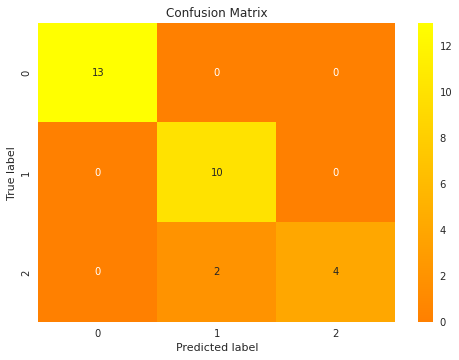

In [30]:
modelEval(ytest, yPreds)

### 4.4 Naïve Bayes<a id=18></a>

Predicting values

In [31]:
output = mlpack.nbc(training=Xtrain, labels=ytrain)
nbc_model = output["output_model"]

In [32]:
predictions = mlpack.nbc(input_model=nbc_model, test=Xtest)

In [33]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Results

Accuracy: 0.9310344827586207
Cohen's Kappa: 0.8901515151515151
Recall Score: 0.9310344827586207
Precision Score: 0.9310344827586207


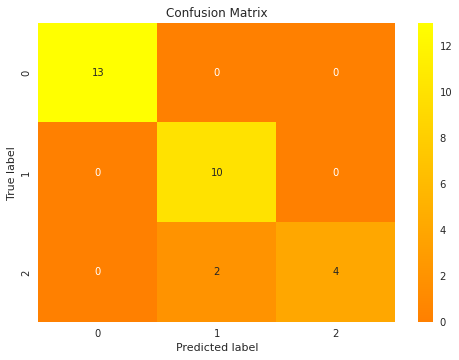

In [34]:
modelEval(ytest, yPreds)

### 4.5 AdaBoost<a id=19></a>

Predicting values

In [35]:
model = mlpack.Adaboost(weak_learner='decision_stump')
output_model = model.fit(training=Xtrain, labels=ytrain)

In [36]:
output_predictions = model.predict(test=Xtest)

In [37]:
yPreds = output_predictions.reshape(-1, 1).squeeze()

Results

Accuracy: 0.9310344827586207
Cohen's Kappa: 0.8901515151515151
Recall Score: 0.9310344827586207
Precision Score: 0.9310344827586207


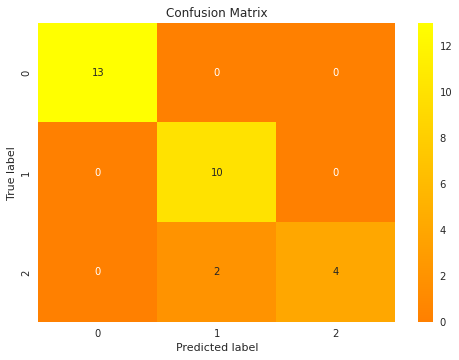

In [38]:
modelEval(ytest, yPreds)

### 4.6 Perceptron (a single level neural network) <a id=20></a>

Predicting values

In [39]:
output = mlpack.perceptron(training=Xtrain, labels=ytrain)
p_model = output["output_model"]

In [40]:
predictions = mlpack.perceptron(input_model= p_model, test=Xtest)

In [41]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Results

Accuracy: 0.9655172413793104
Cohen's Kappa: 0.9454887218045113
Recall Score: 0.9655172413793104
Precision Score: 0.9655172413793104


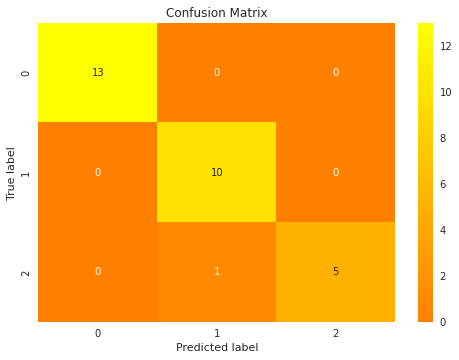

In [42]:
modelEval(ytest, yPreds)

### 4.7 Random forests  <a id=21></a>

Predicting values

In [43]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain)
rf_model = output["output_model"]

In [44]:
predictions = mlpack.random_forest(input_model= rf_model, test=Xtest)

In [45]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Results

Accuracy: 0.9310344827586207
Cohen's Kappa: 0.8901515151515151
Recall Score: 0.9310344827586207
Precision Score: 0.9310344827586207


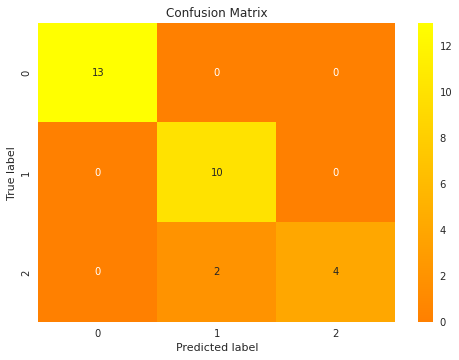

In [46]:
modelEval(ytest, yPreds)

<h1><center>5. Conclusion</center></h1><a id=22></a>

As we can see all the 5 models used in this notebook perform quite similarly on this dataset.

- **Accuracy:** Generally above 0.9

Keep in mind that this dataset is very small (150 entries) so the results change every time you run the notebook